In [2]:
import pandas as pd
import numpy as np
import json

## Bit.ly의 1.USA.gov 데이터

In [3]:
path = 'data/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
records = [json.loads(line) for line in open(path,encoding='UTF-8')]
records[0]['tz']

'America/New_York'

### 순수 파이썬으로 표준시간대 세어보기

In [5]:
time_zones = [rec['tz'] for rec in records] # 모든 데이터가 시간을 갖고있지는 않다.

KeyError: 'tz'

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:8]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '']

In [7]:
def get_count(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [8]:
from collections import defaultdict

def get_count2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] = 1
    return counts

In [15]:
counts = get_count(time_zones)
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [10]:
counts2 = get_count2(time_zones)
counts2

defaultdict(int,
            {'America/New_York': 1,
             'America/Denver': 1,
             'America/Sao_Paulo': 1,
             'Europe/Warsaw': 1,
             '': 1,
             'America/Los_Angeles': 1,
             'Asia/Hong_Kong': 1,
             'Europe/Rome': 1,
             'Africa/Ceuta': 1,
             'Europe/Madrid': 1,
             'Asia/Kuala_Lumpur': 1,
             'Asia/Nicosia': 1,
             'Europe/London': 1,
             'Pacific/Honolulu': 1,
             'America/Chicago': 1,
             'Europe/Malta': 1,
             'Europe/Lisbon': 1,
             'Europe/Paris': 1,
             'Europe/Copenhagen': 1,
             'America/Mazatlan': 1,
             'Europe/Dublin': 1,
             'Europe/Brussels': 1,
             'America/Vancouver': 1,
             'Europe/Amsterdam': 1,
             'Europe/Prague': 1,
             'Europe/Stockholm': 1,
             'America/Anchorage': 1,
             'Asia/Bangkok': 1,
             'Europe/Berlin': 1,

In [11]:
len(time_zones)

3440

In [12]:
def top_counts(count_dict,n=10):
    value_key_pairs = [(count, tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [14]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [17]:
from collections import Counter

counts = Counter(time_zones)
counts

Counter({'America/New_York': 1251,
         'America/Denver': 191,
         'America/Sao_Paulo': 33,
         'Europe/Warsaw': 16,
         '': 521,
         'America/Los_Angeles': 382,
         'Asia/Hong_Kong': 10,
         'Europe/Rome': 27,
         'Africa/Ceuta': 2,
         'Europe/Madrid': 35,
         'Asia/Kuala_Lumpur': 3,
         'Asia/Nicosia': 1,
         'Europe/London': 74,
         'Pacific/Honolulu': 36,
         'America/Chicago': 400,
         'Europe/Malta': 2,
         'Europe/Lisbon': 8,
         'Europe/Paris': 14,
         'Europe/Copenhagen': 5,
         'America/Mazatlan': 1,
         'Europe/Dublin': 3,
         'Europe/Brussels': 4,
         'America/Vancouver': 12,
         'Europe/Amsterdam': 22,
         'Europe/Prague': 10,
         'Europe/Stockholm': 14,
         'America/Anchorage': 5,
         'Asia/Bangkok': 6,
         'Europe/Berlin': 28,
         'America/Rainy_River': 25,
         'Europe/Budapest': 5,
         'Asia/Tokyo': 37,
         'Euro

In [18]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### pandas로 표준시간대 세어보기

In [19]:
frame = pd.DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [24]:
tz_counts = frame.tz.value_counts()
tz_counts

America/New_York         1251
                          521
America/Chicago           400
America/Los_Angeles       382
America/Denver            191
                         ... 
Asia/Pontianak              1
Asia/Riyadh                 1
Europe/Ljubljana            1
America/Montevideo          1
America/Santo_Domingo       1
Name: tz, Length: 97, dtype: int64

In [26]:
clean_tz = frame.tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Unkown'
tz_counts = clean_tz.value_counts()
tz_counts

America/New_York       1251
Unkown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
Africa/Johannesburg       1
America/Monterrey         1
America/Lima              1
Asia/Nicosia              1
Africa/Lusaka             1
Name: tz, Length: 98, dtype: int64

<IPython.core.display.Javascript object>


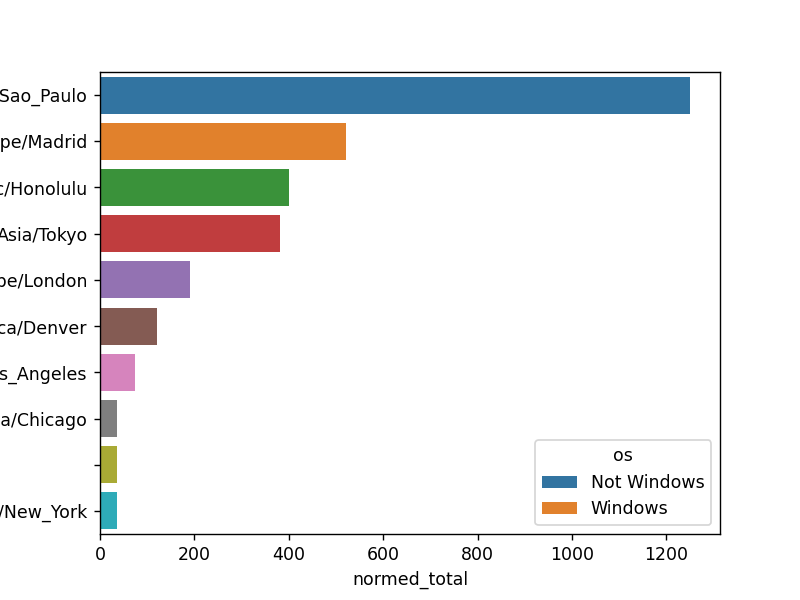

In [67]:
import seaborn as sns
%matplotlib notebook

subset = tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

In [31]:
frame.a[1] # 단축을 실행하는 부라우저,단말기,앱에 대한 정보

'GoogleMaps/RochesterNY'

In [33]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [35]:
cframe = frame[frame.a.notnull()]

cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
cframe

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [39]:
by_tz_os = cframe.groupby(['tz','os'])

agg_counts = by_tz_os.size().unstack().fillna(0)

In [40]:
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [50]:
indexer = agg_counts.sum(1).argsort() # 작은 값부터 순서대로 데이터의 index를 반환해줌
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [52]:
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [62]:
count_subset = agg_counts.take(indexer[-10:]) # top 10
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [59]:
agg_counts.sum(1).nlargest(10) # top 10

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [63]:
count_subset = count_subset.stack()
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [64]:
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<IPython.core.display.Javascript object>


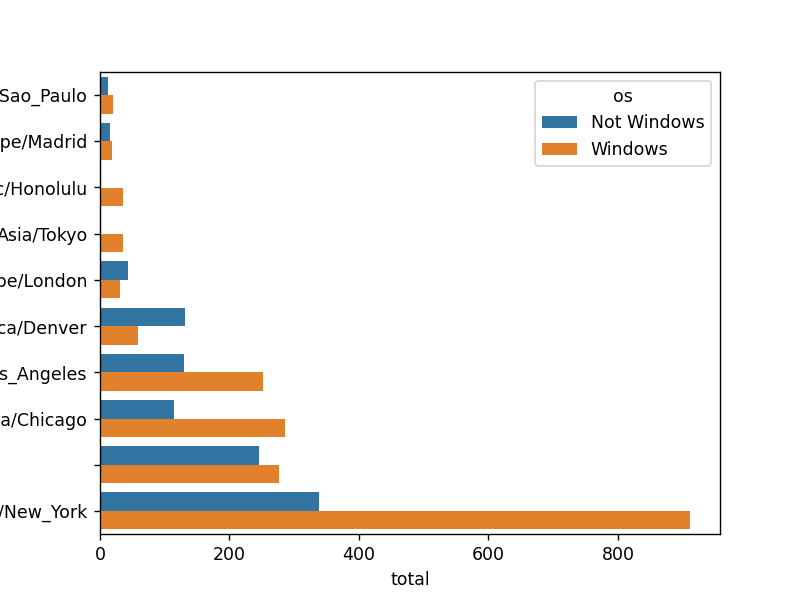

In [75]:
import matplotlib.pylab as plt
plt.figure()
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

In [68]:
def norm_total(group):
    group['normed_total'] = group.total/group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)

<IPython.core.display.Javascript object>


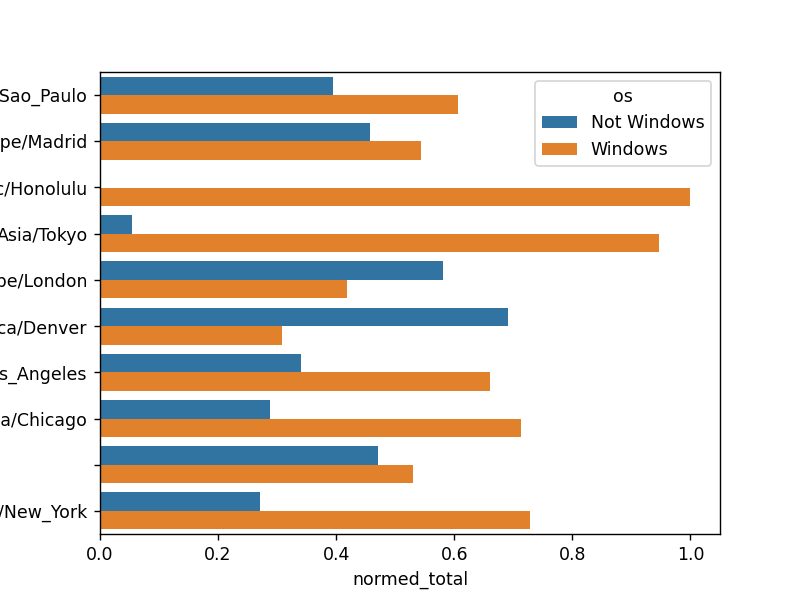

In [76]:
plt.figure()
sns.barplot(x='normed_total',y='tz',hue='os',data=results)

In [78]:
g=count_subset.groupby('tz')
results2 = count_subset.total/g.total.transform('sum')
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

## MovieLens의 영화 평점 데이터

In [80]:
pd.options.display.max_rows = 10

In [81]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/users.dat', sep='::',
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movies.dat', sep='::',
                       header=None, names=mnames)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by sp

In [83]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [84]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [85]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [86]:
data = pd.merge(pd.merge(ratings,users),movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [87]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [88]:
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [91]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [92]:
active_titles = ratings_by_title.index[ratings_by_title>=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [94]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [100]:
top_female_ratings = mean_ratings.sort_values(by='F',ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


### 평점 차이 구하기

In [101]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

sort_by_diff = mean_ratings.sort_values(by='diff')
sort_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [102]:
sort_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [106]:
rating_std_by_title = data.groupby('title')['rating'].std() # 표준편차를 이용해 호불호가 갈리는 영화 찾기
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 신생아 이름

In [110]:
names1880 = pd.read_csv('data/babynames/yob1880.txt',names = ['name','sex','births'])

In [111]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [112]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [113]:
years = range(1880,2011)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'data/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

In [114]:
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [115]:
total_births = names.pivot_table('births',index='year',columns = 'sex',aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<IPython.core.display.Javascript object>


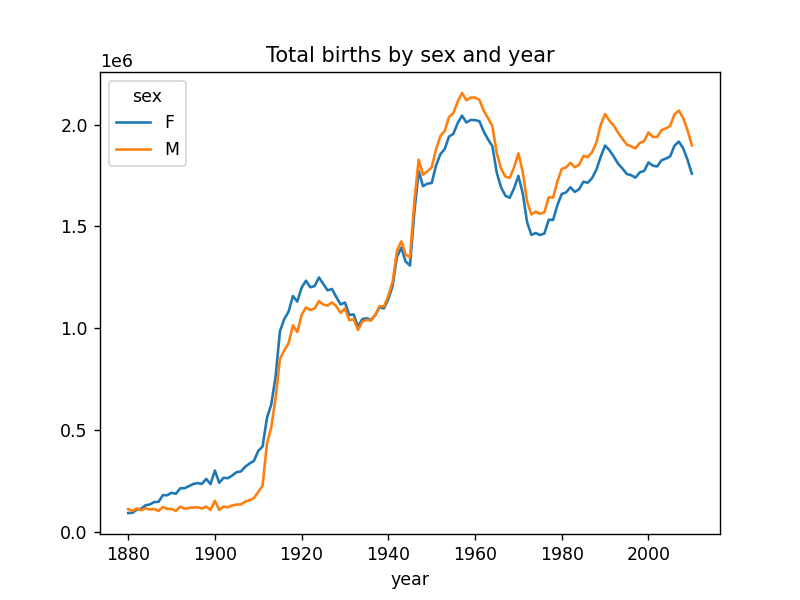

In [118]:
total_births.plot(title='Total births by sex and year')

In [120]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [121]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [123]:
names.groupby(['year','sex']).sum()

births  prop
year sex               
1880 F      90993   1.0
     M     110493   1.0
1881 F      91955   1.0
     M     100748   1.0
1882 F     107851   1.0
...           ...   ...
2008 M    2032310   1.0
2009 F    1827643   1.0
     M    1973359   1.0
2010 F    1759010   1.0
     M    1898382   1.0

[262 rows x 2 columns]

In [126]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [127]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### 이름 유행 분석

In [128]:
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [130]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


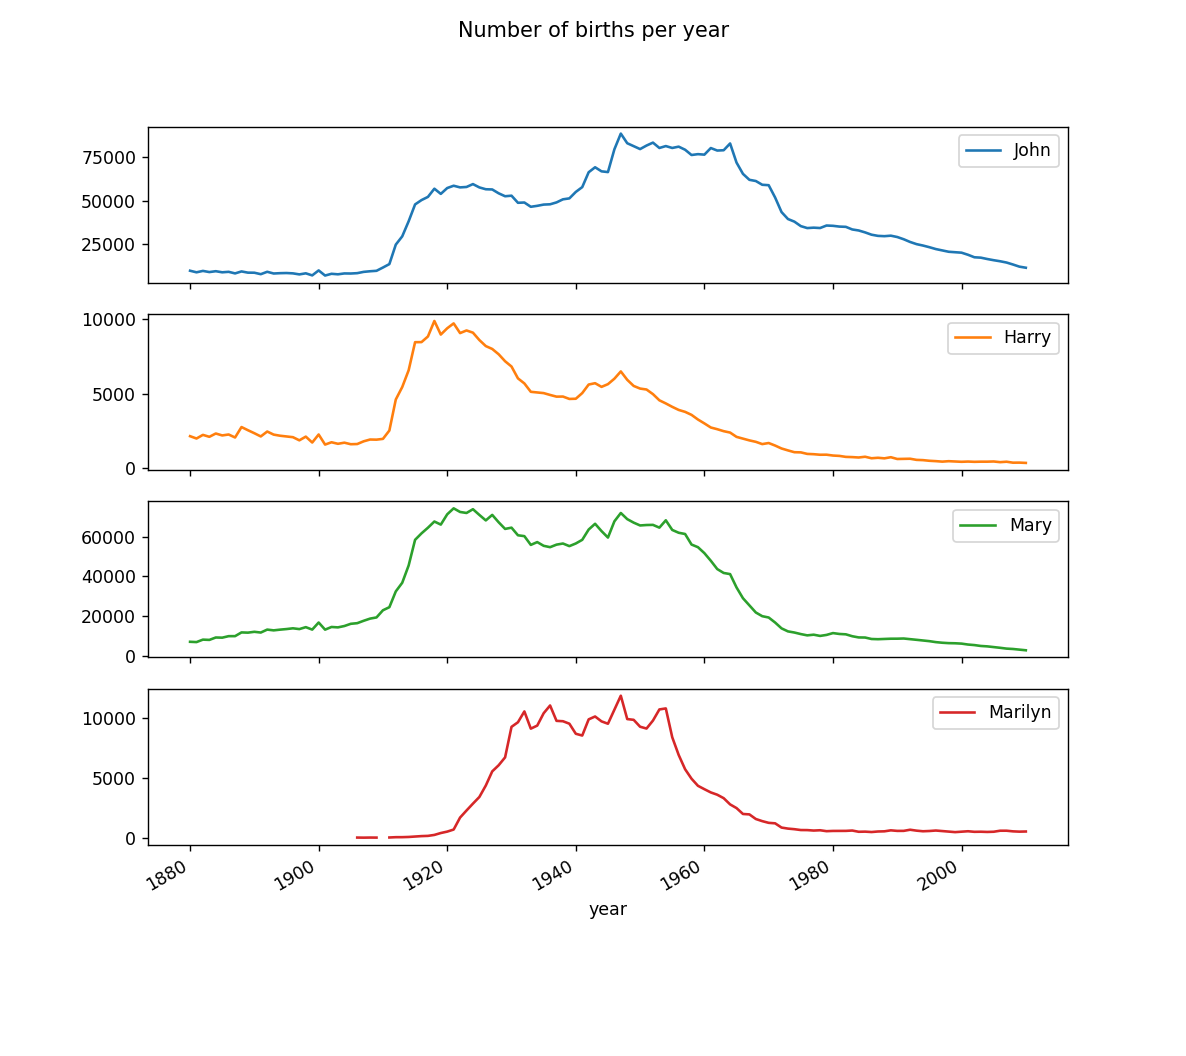

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002073FBD36C8>,
      dtype=object)

In [131]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False,title='Number of births per year')

### 다양한 이름 사용경향

In [136]:
table = top1000.pivot_table('prop',index='year',columns ='sex',aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<IPython.core.display.Javascript object>


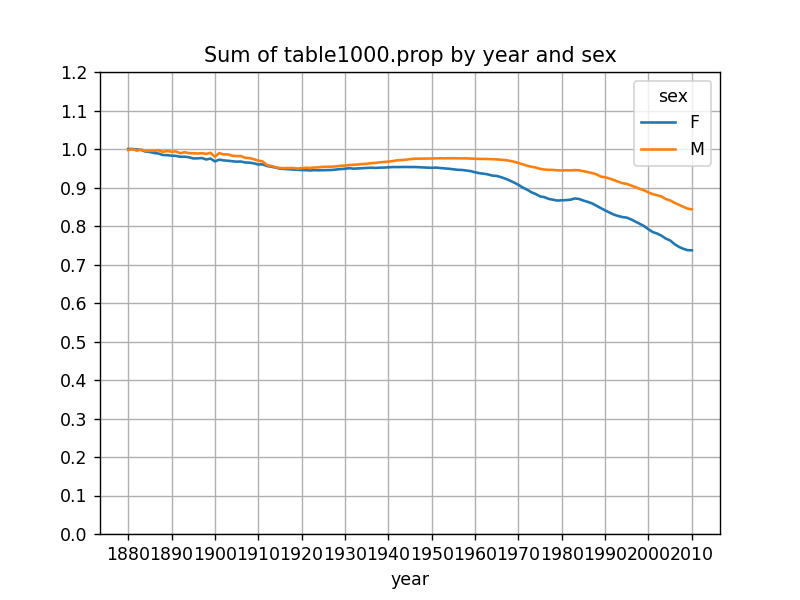

In [138]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10),grid=True)

In [140]:
df = boys[boys.year ==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [141]:
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [147]:
prop_cumsum.values.searchsorted(0.5),prop_cumsum.iloc[116]

(116, 0.5006516075268308)

In [148]:
df = boys[boys.year==1900]
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1

25

In [149]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q) +1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<IPython.core.display.Javascript object>


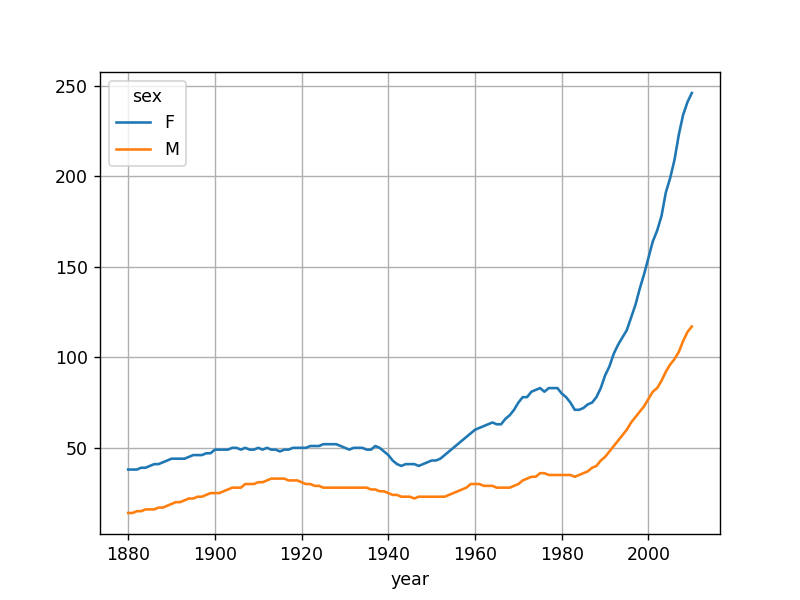

In [151]:
diversity.plot(grid=True)

### 이름 끝글자 변화

In [156]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letters'

table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)
table

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...               ...      ...      ...      ...      ...      ...      ...   
v                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                 NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                 NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y             10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z               106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                      ...         M                      \
year             1887     1888     1889  ...      2001      2002      2003   
last_letters                             ...                                 
a             48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                 NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                 NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d              1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e             54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
...               ...      ...      ...  ...       ...       ...       ...   
v                 NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w                 NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x                 NaN      NaN      NaN  ...   10691.0   11009.0   11718.0   
y             14980.0  17931.0  17601.0  ...  139109.0  134557.0  130569.0   
z               188.0    238.0    277.0  ...    2840.0    2737.0    2722.0   

sex                                                                       \
year              2004      2005      2006      2007      2008      2009   
last_letters                                                               
a              38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b              45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c              26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d              51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e             142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
...                ...       ...       ...       ...       ...       ...   
v               1823.0    1794.0    2010.0    2295.0    2418.0    2589.0   
w              47556.0   45464.0   43217.0   40251.0   36937.0   33181.0   
x              12399.0   13025.0   13992.0   14306.0   14834.0   16640.0   
y             128367.0  125190.0  123707.0  123397.0  122633.0  112922.0   
z               2710.0    2903.0    3086.0    3301.0    3473.0    3633.0   

sex                     
year              2010  
last_letters            
a              28438.0  
b              38859.0  
c              23125.0  
d              44398.0  
e             129012.0  
...                ...  
v               2723.0  
w              30656.0  
x              16352.0  
y             110425.0  
z               3476.0  

[26 rows x 262 columns]

In [157]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex                  F                            M                    
year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                  NaN     694.0     450.0    411.0    3912.0   38859.0
c                  5.0      49.0     946.0    482.0   15476.0   23125.0
d               6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e             133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [158]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [160]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                  F                             M                    
year              1910      1960      2010      1910      1960      2010
last_letters                                                            
a             0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                  NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c             0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d             0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e             0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...                ...       ...       ...       ...       ...       ...
v                  NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w             0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x             0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y             0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z             0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

<IPython.core.display.Javascript object>


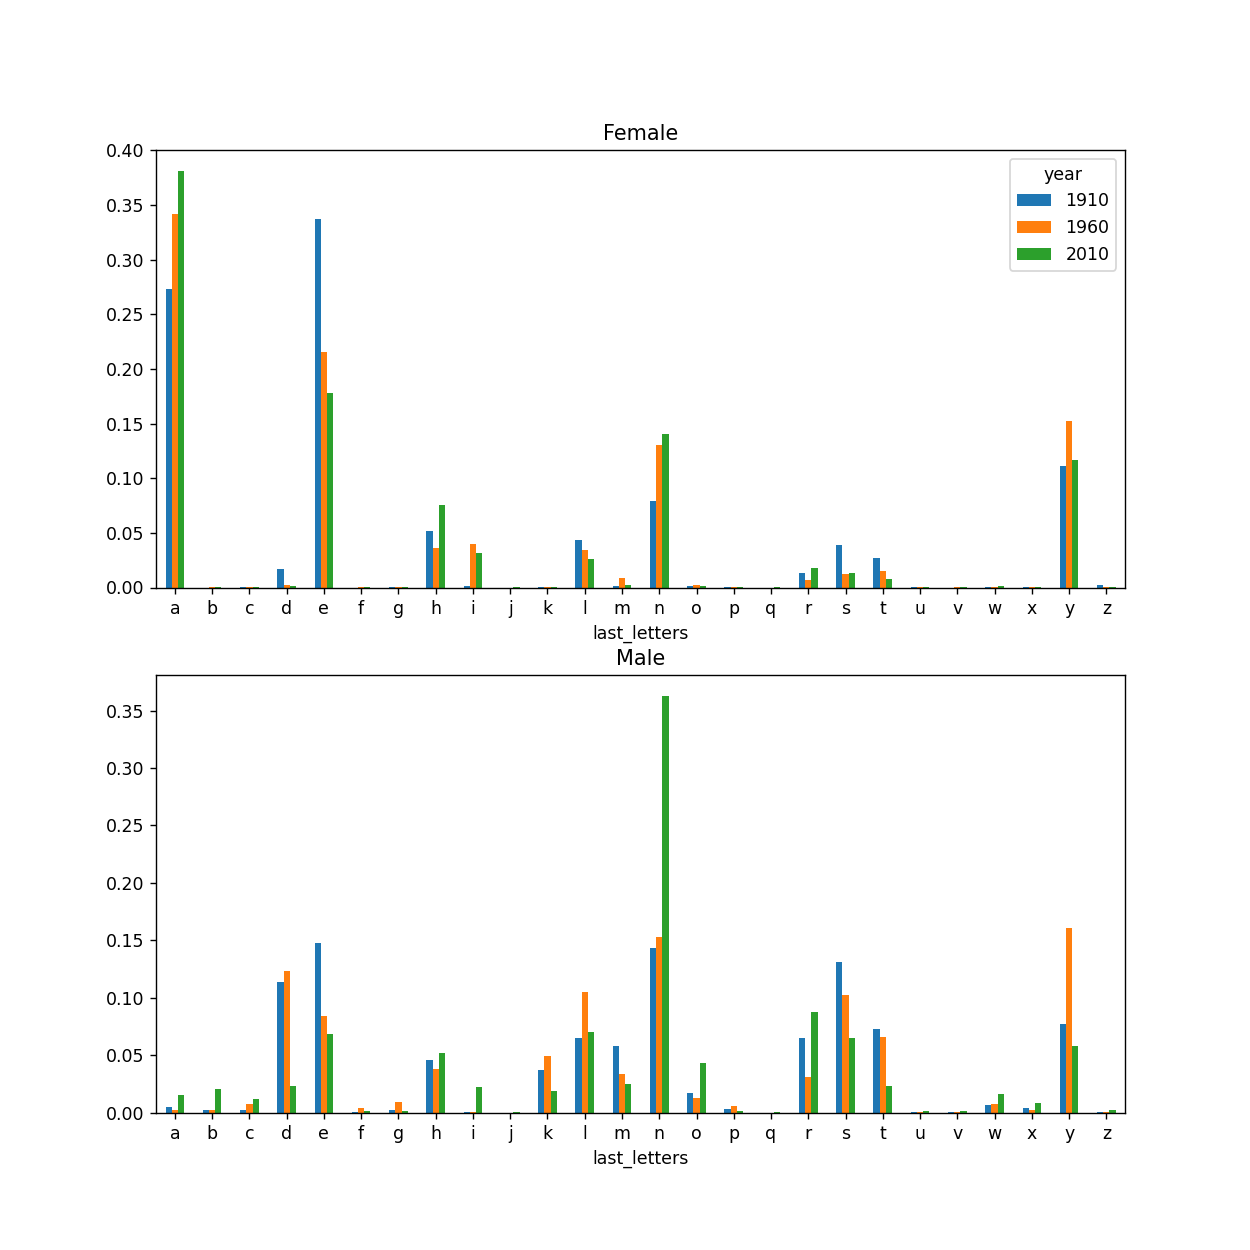

In [165]:
fig,axes = plt.subplots(2,1, figsize=(10,10))
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[0],title='Female')
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[1],title='Male',legend=False)

In [167]:
letter_prop = table/table.sum()
deny_ts = letter_prop.loc[['d','e','n','y'],'M'].T
deny_ts

last_letters,d,e,n,y
year,,,,
1880,0.083055,0.122116,0.153213,0.075760
1881,0.083247,0.123139,0.153214,0.077451
1882,0.085340,0.128537,0.149560,0.077537
1883,0.084066,0.126070,0.151646,0.079144
1884,0.086120,0.127895,0.149915,0.080405
...,...,...,...,...
2006,0.025075,0.069748,0.351666,0.060338
2007,0.024451,0.069445,0.358274,0.059634
2008,0.023574,0.069362,0.361101,0.060342


<IPython.core.display.Javascript object>


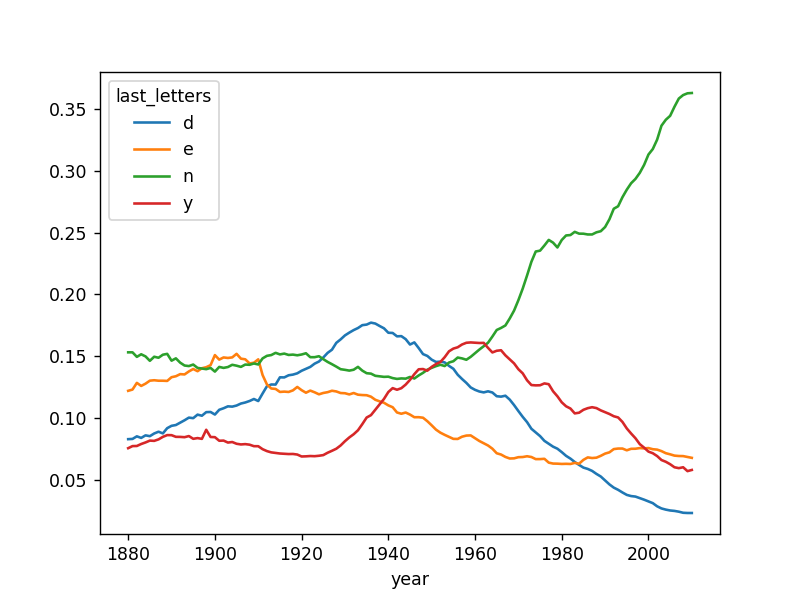

In [169]:
deny_ts.plot()

### 남녀 이름 서로 바뀐경우

In [171]:
all_names = pd.Series(top1000.name.unique())
lesl_like = all_names[all_names.str.lower().str.contains('lesl')]
lesl_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [176]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [172]:
filtered = top1000[top1000.name.isin(lesl_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [179]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
table = table.div(table.sum(1),axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


<IPython.core.display.Javascript object>


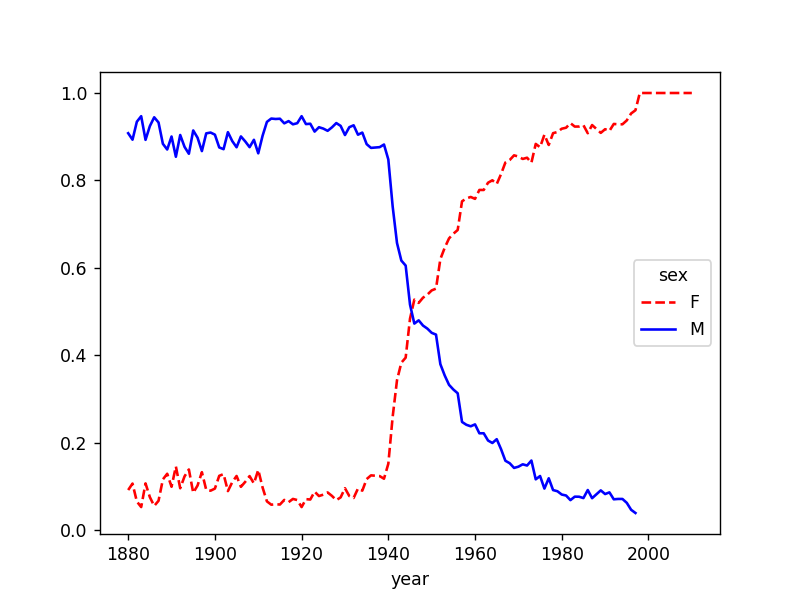

In [221]:
table.plot(style={'M':'b-','F':'r--'})

## 미국농무부 영양소 정보

In [184]:
import json

db = json.load(open('data/database.json'))
len(db)

6636

In [185]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [189]:
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [187]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [195]:
info_keys = ['description','group','id','manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [196]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [191]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [201]:
df = pd.DataFrame(db[0]['nutrients'])
df

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [203]:
total_list = []
for i in range(len(db)):
    df = pd.DataFrame(db[i]['nutrients'])
    df['id'] = db[i]['id']
    total_list.append(df)
nutrients = pd.concat(total_list,ignore_index=True)

In [206]:
nutrients = nutrients[['description','group','units','value','id']]
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [207]:
nutrients.duplicated().sum()

14179

In [208]:
nutrients.drop_duplicates(inplace=True,ignore_index=True)
nutrients

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
375171,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
375172,Cholesterol,Other,mg,0.000,43546
375173,"Fatty acids, total saturated",Other,g,0.072,43546
375174,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [209]:
col_mapping = {'description':'food','group':'fgroup'}
info = info.rename(columns=col_mapping)

In [210]:
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [211]:
col_mapping = {'description':'nutrient','group':'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
375171,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
375172,Cholesterol,Other,mg,0.000,43546
375173,"Fatty acids, total saturated",Other,g,0.072,43546
375174,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [212]:
ndata = pd.merge(nutrients,info,on='id',how='outer')

In [213]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   nutrient      375176 non-null  object 
 1   nutgroup      375176 non-null  object 
 2   units         375176 non-null  object 
 3   value         375176 non-null  float64
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [214]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [219]:
ndata.groupby(['nutrient','fgroup'])['value'].size()

nutrient          fgroup                           
Adjusted Protein  Sweets                                 1
                  Vegetables and Vegetable Products      1
Alanine           Baby Foods                            37
                  Baked Products                       378
                  Beef Products                        598
                                                      ... 
Zinc, Zn          Snacks                               154
                  Soups, Sauces, and Gravies           156
                  Spices and Herbs                      41
                  Sweets                               279
                  Vegetables and Vegetable Products    795
Name: value, Length: 2246, dtype: int64

In [217]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

<IPython.core.display.Javascript object>


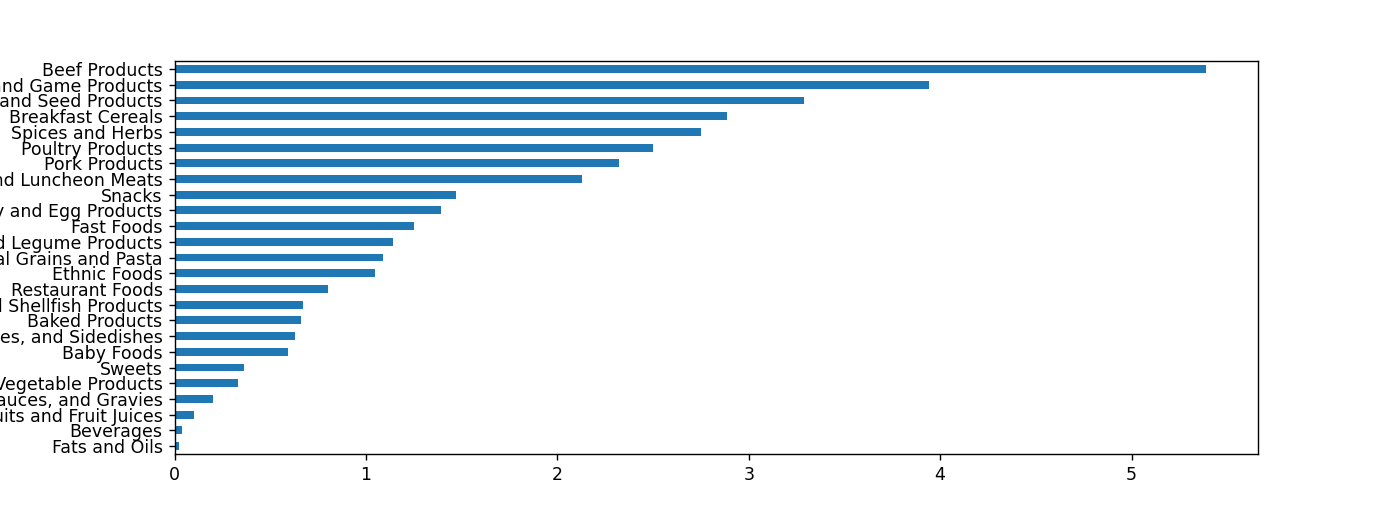

In [222]:
plt.figure()
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [226]:
by_nutrient = ndata.groupby(['nutgroup','nutrient'])

get_maximum = lambda x:x.loc[x.value.idxmax()]
get_minimum = lambda x:x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value','food']]
max_foods.food = max_foods.food[:50]
max_foods

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                  food  
nutgroup    nutrient                                                                    
Amino Acids Alanine                                  Gelatins, dry powder, unsweetened  
            Arginine                                      Seeds, sesame flour, low-fat  
            Aspartic acid                                          Soy protein isolate  
            Cystine                       Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                          Soy protein isolate  
...                                                                                ...  
Vitamins    Vitamin D2 (ergocalciferol)                                            NaN  
            Vitamin D3 (cholecalciferol)                                           NaN  
            Vitamin E (alpha-tocopherol)                                           NaN  
            Vitamin E, added                                                       NaN  
            Vitamin K (phylloquinone)                                              NaN  

[94 rows x 2 columns]

## 2012년 연방선거관리위원회 데이터 베이스

In [230]:
fec = pd.read_csv('data/P00000001-ALL.csv')
fec.info()

C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [231]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [233]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [234]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [235]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [236]:
fec['party'] = fec.cand_nm.map(parties)
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [238]:
fec = fec[fec.contb_receipt_amt>0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [239]:
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,Democrat
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


### 직업 및 고용주에 따른 기부 통계

In [240]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [241]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

C:\Users\Playdata\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [242]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

fec.contbr_employer = fec.contbr_employer.map(lambda x:emp_mapping.get(x,x))

C:\Users\Playdata\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [246]:
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc=sum)
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


<IPython.core.display.Javascript object>


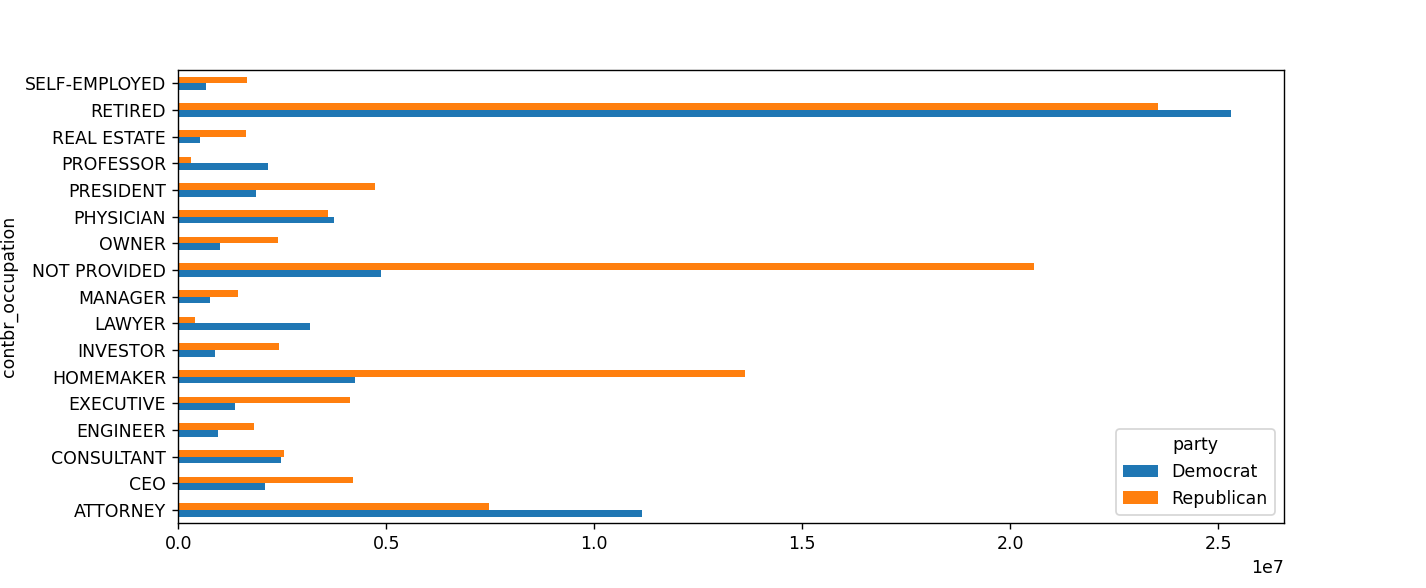

In [248]:
# plt.figure()
over_2mm.plot(kind='barh')

### 기부금액

In [249]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)

In [250]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [252]:
grouped = fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [253]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<IPython.core.display.Javascript object>


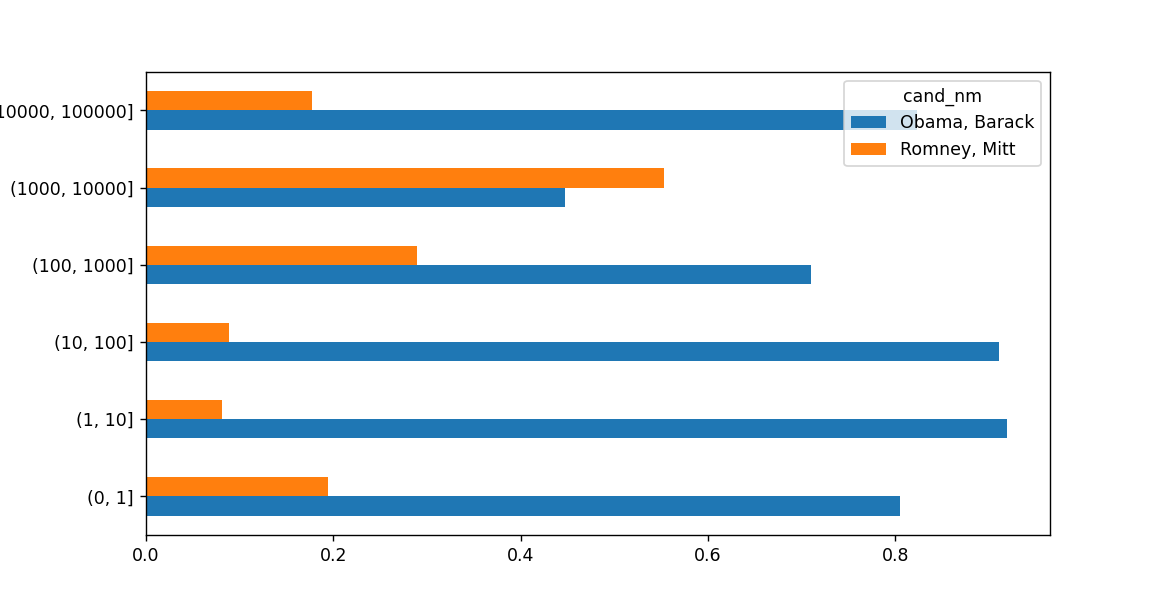

In [258]:
# plt.figure()
normed_sums[:-2].plot(kind='barh')

### 주별 기부 통계

In [262]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])

totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1)>100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
...,...,...
WA,4250933.16,1341521.56
WI,1130155.46,270316.32
WV,169154.47,126725.12


In [264]:
percent = totals.div(totals.sum(1),axis=0)
percent

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
...,...,...
WA,0.760119,0.239881
WI,0.806982,0.193018
WV,0.571700,0.428300
